<a href="https://colab.research.google.com/github/TonyQ2k3/pytorch-training/blob/main/notebooks/pytorch_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Day 3

---

In [2]:
# Imports
import torch
from torch import nn
import matplotlib.pyplot as plt

## Model Testing Loop

In [30]:
# Model creation and train code
weight = 0.7
bias = 0.3
x = torch.arange(0, 1, 0.02, dtype=torch.float)
y = weight * x + bias

split_index = int(0.8 * len(x))
x_train, y_train = x[:split_index], y[:split_index]
x_test, y_test = x[split_index:], y[split_index:]

def plot_visual(
    train_data=x_train,
    train_labels=y_train,
    test_data=x_test,
    test_labels=y_test,
    predictions=None
):
  plt.figure((10, 7))
  plt.title("Dataset visualization")
  plt.scatter(x_train, y_train, s=4, c='b', label="Train")
  plt.scatter(x_test, y_test, s=4, c='g', label="Test")
  if predictions is not None:
    plt.scatter(x_test, predictions, s=4, c='r', label="Prediction")
  plt.legend(prop={"size": 4})
  plt.show()


class LinearRegressionModel(nn.Module):
    def __init__(self):
      super().__init__()
      self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
      self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weight * x + self.bias



In [91]:
# Create model
model = LinearRegressionModel()

# Define LF, OP and EP
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
epochs = 100

In [95]:
# Losses list
train_losses = []
test_losses = []
epoch_count = torch.arange(0, epochs, 10, dtype=torch.int)

In [96]:
# Train function
def train_model():
  for epoch in range(epochs):
    model.train()
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)


    if epoch % 10 == 0:
      # Add training loss to list
      train_losses.append(loss.item())
      print(f"Epoch: {epoch} | Loss: {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Start training
train_model()

Epoch: 0 | Loss: 0.2509557008743286
Epoch: 10 | Loss: 0.13574568927288055
Epoch: 20 | Loss: 0.020535754039883614
Epoch: 30 | Loss: 0.003771544899791479
Epoch: 40 | Loss: 0.003951908089220524
Epoch: 50 | Loss: 0.003951908089220524
Epoch: 60 | Loss: 0.003951908089220524
Epoch: 70 | Loss: 0.003951908089220524
Epoch: 80 | Loss: 0.003951908089220524
Epoch: 90 | Loss: 0.003951908089220524


For the testing loop, first we need to create some empty lists for storing useful values.

We then put the model into evaluation mode with `model.eval()`. The evaluation process is similar to that of training, except we calculate the loss between **the prediction labels and the test labels**

In [97]:
# Checking model params
print(model.state_dict())

OrderedDict([('weight', tensor([0.6940])), ('bias', tensor([0.2984]))])


In [76]:
# Validation set
x_valid = torch.arange(1, 2, 0.05, dtype=torch.float)
y_valid = weight * x_valid + bias
print(x_valid)
print(y_valid)

tensor([1.0000, 1.0500, 1.1000, 1.1500, 1.2000, 1.2500, 1.3000, 1.3500, 1.4000,
        1.4500, 1.5000, 1.5500, 1.6000, 1.6500, 1.7000, 1.7500, 1.8000, 1.8500,
        1.9000, 1.9500])
tensor([1.0000, 1.0350, 1.0700, 1.1050, 1.1400, 1.1750, 1.2100, 1.2450, 1.2800,
        1.3150, 1.3500, 1.3850, 1.4200, 1.4550, 1.4900, 1.5250, 1.5600, 1.5950,
        1.6300, 1.6650])


In [98]:
# Eval function
def eval_model():
  model.eval()
  for epoch in range(epochs):
    with torch.inference_mode():
      valid_pred = model(x_valid)
      valid_loss = loss_fn(valid_pred, y_valid)
    if epoch % 10 == 0:
      test_losses.append(valid_loss.item())
      print(f"Epoch: {epoch} | Loss: {valid_loss}")


# Start evaluating
eval_model()

Epoch: 0 | Loss: 0.010461321100592613
Epoch: 10 | Loss: 0.010461321100592613
Epoch: 20 | Loss: 0.010461321100592613
Epoch: 30 | Loss: 0.010461321100592613
Epoch: 40 | Loss: 0.010461321100592613
Epoch: 50 | Loss: 0.010461321100592613
Epoch: 60 | Loss: 0.010461321100592613
Epoch: 70 | Loss: 0.010461321100592613
Epoch: 80 | Loss: 0.010461321100592613
Epoch: 90 | Loss: 0.010461321100592613


Define a function to visualize training losses and testing losses

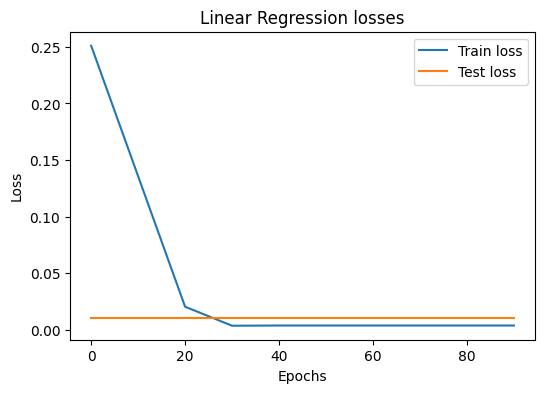

In [99]:
def loss_plot():
  plt.figure(figsize=(6, 4))
  plt.title("Linear Regression losses")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")

  # Train loss
  plt.plot(epoch_count, train_losses, label="Train loss")
  # Test loss
  plt.plot(epoch_count, test_losses, label="Test loss")

  plt.legend()
  plt.show()

loss_plot()

In [77]:
# Reset (if needed)
test_losses = []